<a href="https://colab.research.google.com/github/singh-shalini/heart-disease-prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('heart.csv')

In [ ]:
print(df.head())
print (df.shape)
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
(918, 12)


In [ ]:
print(y.value_counts())

HeartDisease
1    508
0    410
Name: count, dtype: int64


#Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
le6 = LabelEncoder()
le8 = LabelEncoder()
le10 = LabelEncoder()
x.iloc[:,1] = le1.fit_transform(x.iloc[:,1])
x.iloc[:,2] = le2.fit_transform(x.iloc[:,2])
x.iloc[:,6] = le6.fit_transform(x.iloc[:,6])
x.iloc[:,8] = le8.fit_transform(x.iloc[:,8])
x.iloc[:,10] = le10.fit_transform(x.iloc[:,10])

In [ ]:
print(x);

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   1             1        140          289          0          1   
1     49   0             2        160          180          0          1   
2     37   1             1        130          283          0          2   
3     48   0             0        138          214          0          1   
4     54   1             2        150          195          0          1   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   1             3        110          264          0          1   
914   68   1             0        144          193          1          1   
915   57   1             0        130          131          0          1   
916   57   0             1        130          236          0          0   
917   38   1             2        138          175          0          1   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  
0      172              0      0.0       

#Splitting Dataset into Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=0)

##Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler #mean=0, var=1
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
print(X_test)

[[ 0.20230716  0.51017053 -0.77912558 ... -0.78360391 -0.66533939
  -0.60665455]
 [ 1.32722389  0.51017053 -0.77912558 ... -0.78360391 -0.40168731
  -0.60665455]
 [-0.20675347  0.51017053 -0.77912558 ... -0.78360391 -0.75322342
  -0.60665455]
 ...
 [-0.10448831  0.51017053 -0.77912558 ... -0.78360391 -0.75322342
   1.0846248 ]
 [-1.63846567  0.51017053  0.24486804 ... -0.78360391 -0.75322342
   1.0846248 ]
 [-0.00222316  0.51017053  1.26886166 ...  1.27615494 -0.75322342
  -0.60665455]]


#Training the dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_randomforest = RandomForestClassifier()
model_randomforest.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_kneighbors = KNeighborsClassifier()
model_kneighbors.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_decision = DecisionTreeClassifier()
model_decision.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train,Y_train)

SVC()

#Making the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score,  precision_score, recall_score


In [ ]:
y_pred_logistic = model_logistic.predict(X_test)
y_pred_neighbors = model_kneighbors.predict(X_test)
y_pred_svm = model_svm.predict(X_test)
y_pred_decision = model_decision.predict(X_test)
y_pred_random = model_randomforest.predict(X_test)


In [ ]:
cm = confusion_matrix(Y_test,y_pred_random)
print(cm)

[[62 15]
 [11 96]]


In [ ]:
print(y_pred_logistic)
# print(y_pred_neighbors)
# print(y_pred_svm)
# print(y_pred_decision)
# print(y_pred_random)

[1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1
 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1]


##Comparing the Accuracy

In [ ]:
RandomForest_Accuracy = accuracy_score(Y_test,y_pred_random)
LogisticRegression_Accuracy = accuracy_score(Y_test,y_pred_logistic)
KNeighbors_Accuracy = accuracy_score(Y_test,y_pred_neighbors)
SVM_Accuracy = accuracy_score(Y_test,y_pred_svm)
Decision_Accuracy = accuracy_score(Y_test,y_pred_decision)

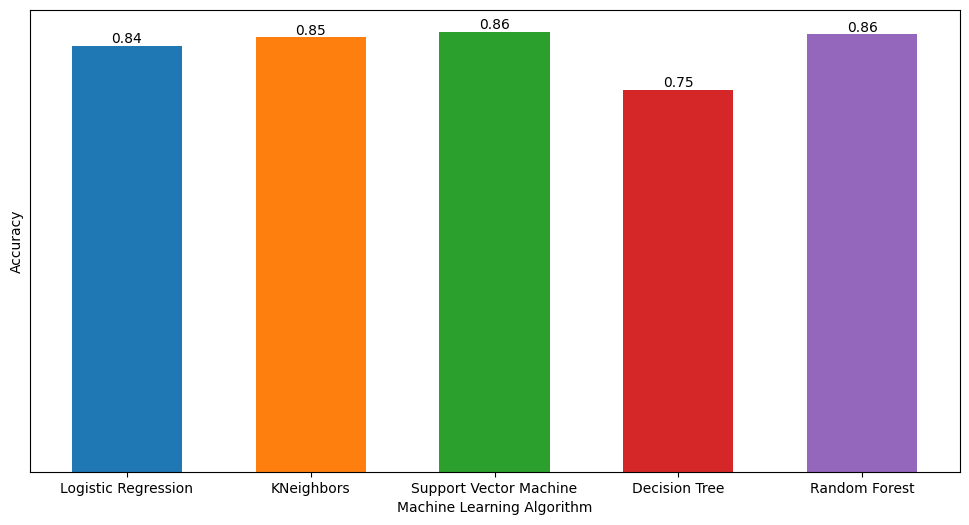

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar("Logistic Regression",LogisticRegression_Accuracy,width=0.6)
plt.bar("KNeighbors",KNeighbors_Accuracy,width=0.6)
plt.bar("Support Vector Machine",SVM_Accuracy,width=0.6)
plt.bar("Decision Tree",Decision_Accuracy,width=0.6)
plt.bar("Random Forest",RandomForest_Accuracy,width=0.6)
plt.yticks([])
plt.xlabel("Machine Learning Algorithm")
plt.ylabel("Accuracy")

# Add text labels above each bar
x_coords = ['Logistic Regression', 'KNeighbors', 'Support Vector Machine', 'Decision Tree', 'Random Forest']
y_coords = [LogisticRegression_Accuracy, KNeighbors_Accuracy, SVM_Accuracy, Decision_Accuracy, RandomForest_Accuracy]
for i in range(len(x_coords)):
    plt.text(x_coords[i], y_coords[i], f'{y_coords[i]:.2f}', ha='center', va='bottom')

In [ ]:
print(RandomForest_Accuracy)
print(LogisticRegression_Accuracy)
print(KNeighbors_Accuracy)
print(SVM_Accuracy)
print(Decision_Accuracy)

0.8586956521739131
0.8369565217391305
0.8532608695652174
0.8641304347826086
0.75


In [ ]:
def print_metrics(y_true, y_pred, model_name):
    print(f"Metrics for {model_name}:")
    print(f"Precision: {precision_score(y_true, y_pred)}")
    print(f"  Recall: {recall_score(y_true, y_pred)}")
print_metrics(Y_test, y_pred_random, "Random Forest")

Metrics for Random Forest:
Precision: 0.8648648648648649
  Recall: 0.897196261682243


#Single Prediction

In [ ]:
result = model_randomforest.predict(sc.transform([[40,1,2,110,290,1,2,160,0,2.2,1]]))
if result == [0]:
    print('Person Not Having Heart Disease')
else:
    print("Person Having Heart Disease")

Person Having Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#Visualizing the data


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Pair Plot

The pair plot visualizes the pairwise relationships between all numerical features in the dataset.  Each small plot shows the relationship between two variables, and the points are colored based on the target variable ('HeartDisease').  Look for patterns or separations between the classes in these plots.

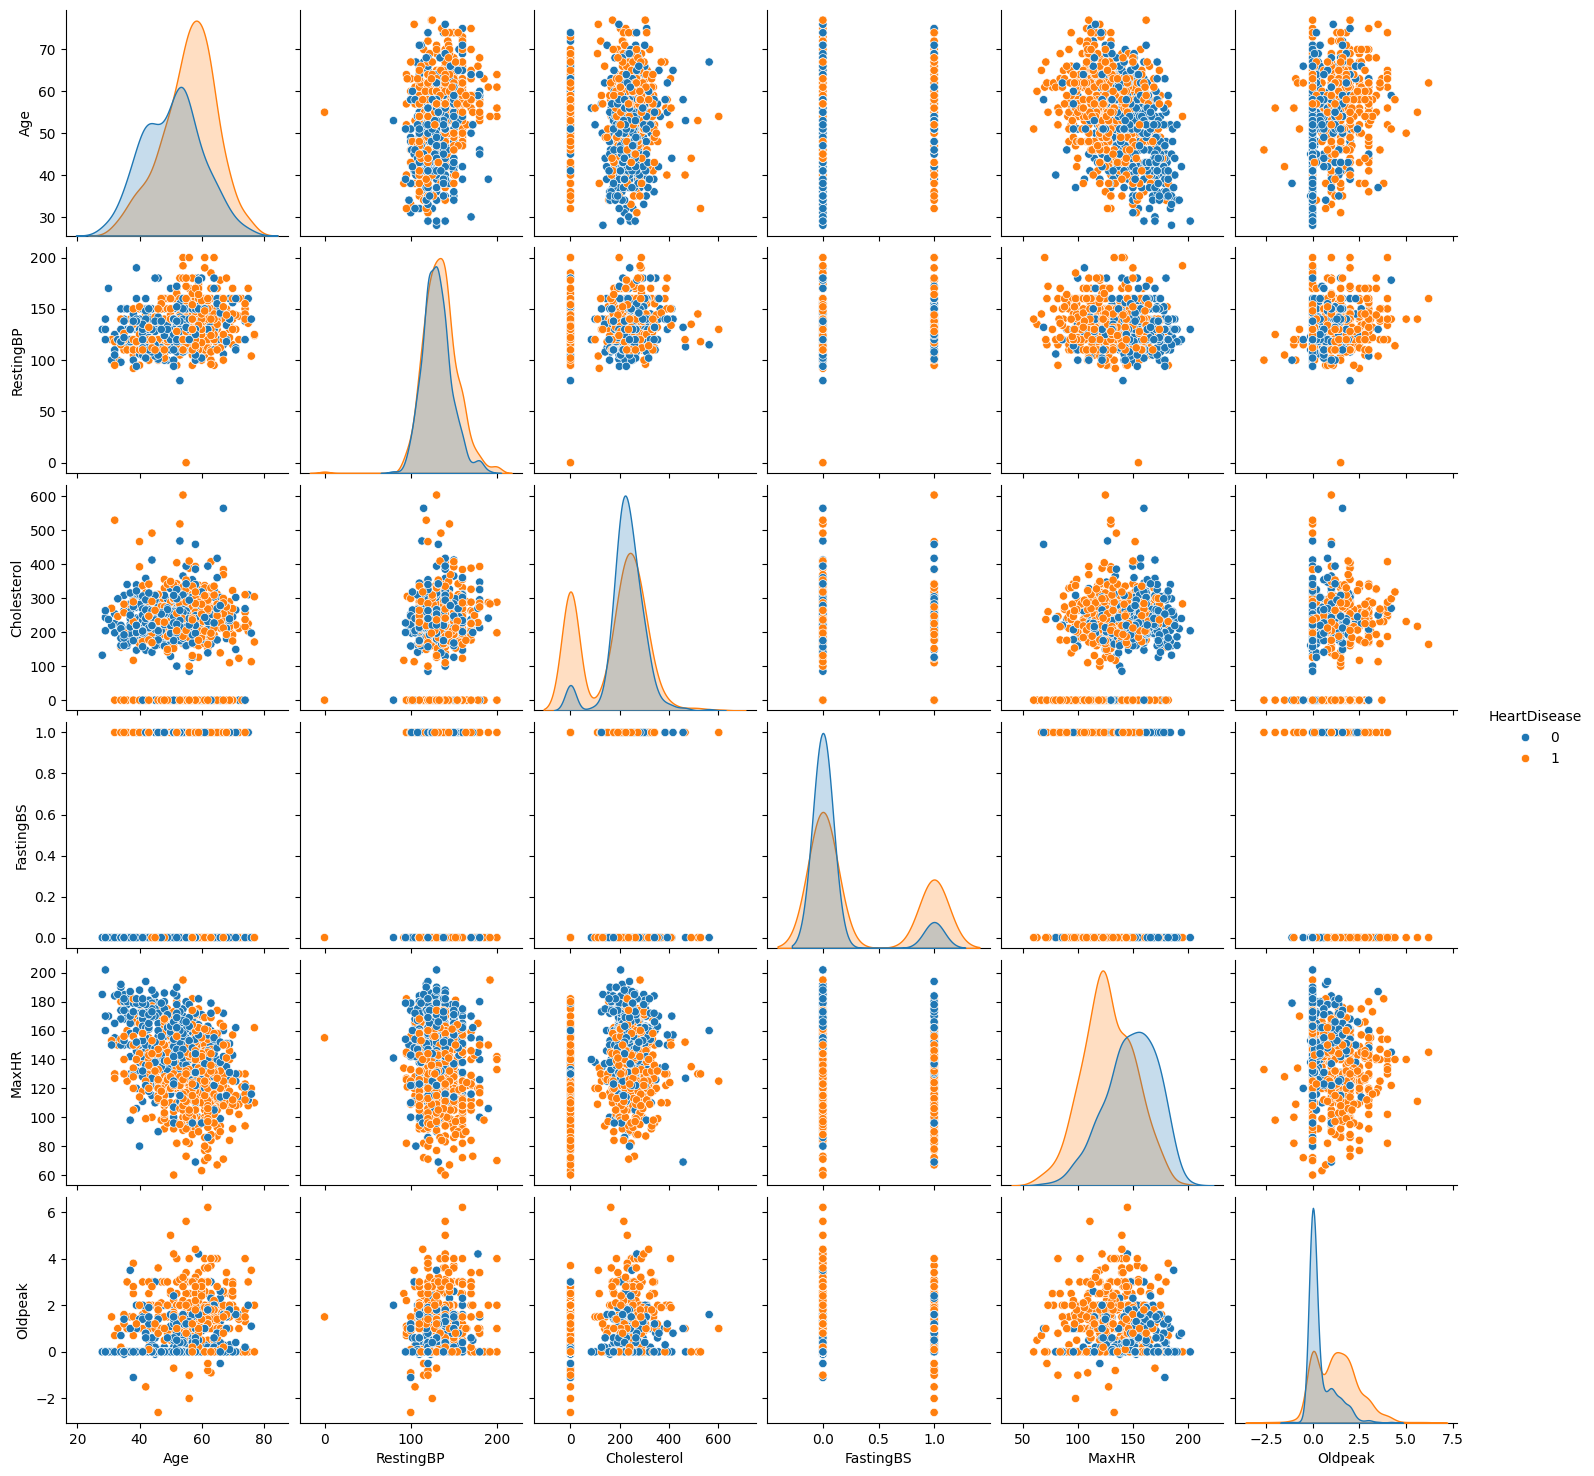

In [ ]:
# Pairplot to visualize relationships between all numerical features
sns.pairplot(df, hue='HeartDisease')
plt.show()

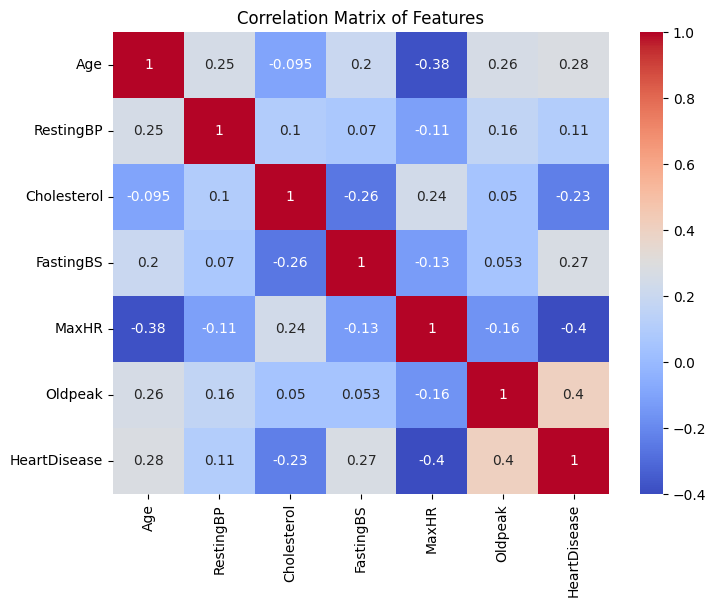

In [ ]:
#Correlation matrix heatmap
plt.figure(figsize=(8, 6))
# Select only numeric features for correlation calculation
correlation_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

#Feature Importance Plot
Feature importance analysis helps us understand which of these attributes are most influential in the model's predictions.

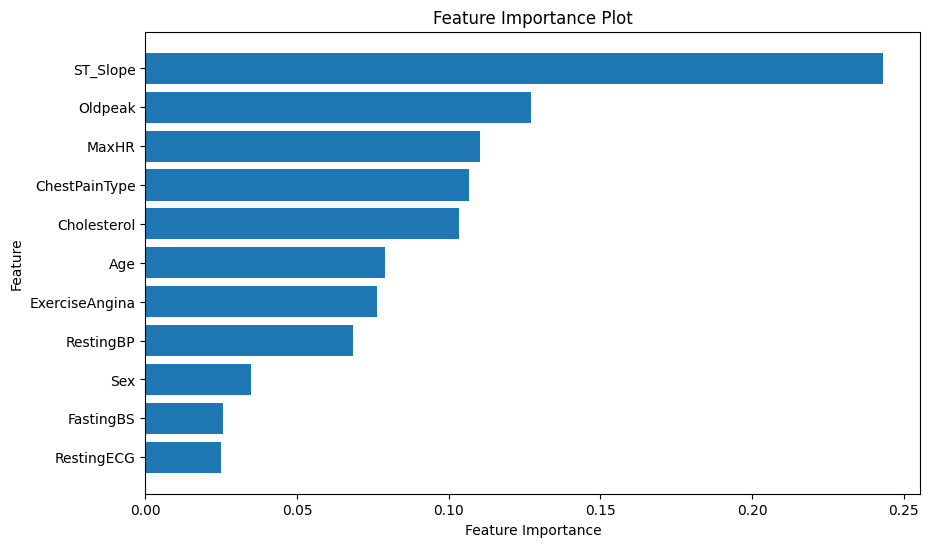

In [ ]:
import matplotlib.pyplot as plt

feature_importances = model_randomforest.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()

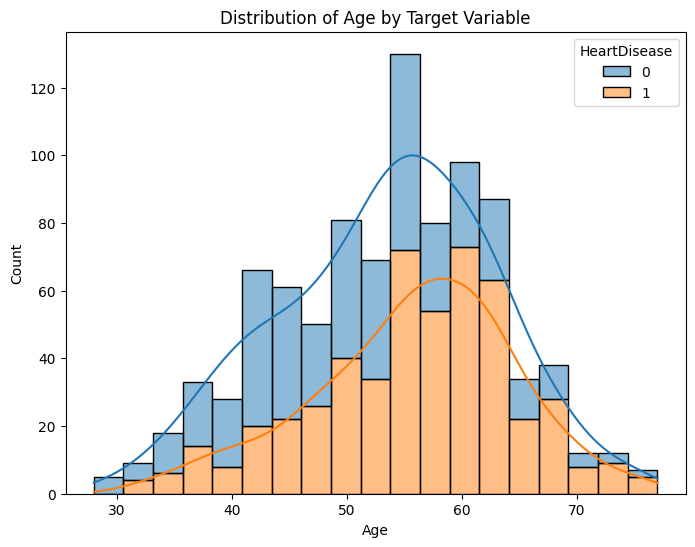

In [ ]:
# Histogram of age grouped by target
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Age", hue="HeartDisease", multiple="stack", kde=True)
plt.title("Distribution of Age by Target Variable")
plt.show()

#Interface for Detection


In [ ]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import gradio as gr

In [ ]:
def predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope):
    input_data = [[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope]]
    input_data[0][1] = le1.transform([input_data[0][1]])[0]
    input_data[0][2] = le2.transform([input_data[0][2]])[0]
    input_data[0][6] = le6.transform([input_data[0][6]])[0]
    input_data[0][8] = le8.transform([input_data[0][8]])[0]
    input_data[0][10] = le10.transform([input_data[0][10]])[0]

    scaled_input = sc.transform(input_data)
    prediction = model_randomforest.predict(scaled_input)

    if prediction == [0]:
        result = 'Person Not Having Heart Disease'
    else:
        result = "Person Having Heart Disease"
    return result

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_heart_disease,
    inputs=[
        gr.Number(minimum=20, maximum=100, label="Age"),
        gr.Radio(choices=["M", "F"], label="Sex"),
        gr.Dropdown(choices=["TA", "ATA", "NAP", "ASY"], label="Chest Pain Type"),
        gr.Slider(minimum=90, maximum=200, label="Resting Blood Pressure"),
        gr.Slider(minimum=100, maximum=600, label="Cholesterol"),
        gr.Radio(choices=[0, 1], label="Fasting Blood Sugar > 120 mg/dl "),
        gr.Dropdown(choices=["Normal", "ST", "SVH"], label="Resting ECG"),
        gr.Slider(minimum=50, maximum=200, label="Maximum Heart Rate"),
        gr.Radio(choices=["Y", "N"], label="Exercise Induced Angina"),
        gr.Slider(minimum=0.0, maximum=6.0, label="ST Depression Induced by Exercise"),
        gr.Dropdown(choices=["Up", "Flat", "Down"], label="Slope of the Peak Exercise ST Segment")
    ],
    outputs=gr.Textbox(label="Prediction"),
    title="<h1 style='text-align:center;'> Heart Disease Prediction </h1>",
    description="<div style='text-align:center;'> A Machine Learning model to predict heart disease. Enter patient's data to predict the possibility of Heart Disease </div>",
)

iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b53dc91678a3cf012c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
